<a href="https://colab.research.google.com/github/eletap/ML-Churn-Prediction/blob/main/ML_Churn_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive
from google.colab.patches import cv2_imshow

drive.mount('/content/drive')

Mounted at /content/drive


In [1]:
!pip3 install pickle5


     |████████████████████████████████| 132 kB 10.3 MB/s 
  Created wheel for pickle5: filename=pickle5-0.0.11-cp37-cp37m-linux_x86_64.whl size=219292 sha256=e506948315bc3c368f99904b97c0869946835812cc20a03c294f0e3f1e455bbc
  Stored in directory: /root/.cache/pip/wheels/7e/6a/00/67136a90d6aca437d806d1d3cedf98106e840c97a3e5188198
Successfully built pickle5


In [1]:
!pip install pandas==1.3.2

     |████████████████████████████████| 11.3 MB 7.1 MB/s 
  Attempting uninstall: pandas
    Found existing installation: pandas 1.1.5
    Uninstalling pandas-1.1.5:
      Successfully uninstalled pandas-1.1.5
4/1AX4XfWiZ8ZJ_nz0OeIJUrmvNmSK5JuVmaIyP6R_-iuCre-Iq-BhWwVwm8T8ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires pandas~=1.1.0; python_version >= "3.0", but you have pandas 1.3.2 which is incompatible.


In [8]:
import pandas as pd
import pickle as pickle

print("Loading Data from DataFrames")
pickle.HIGHEST_PROTOCOL = 5

DF1 = pd.read_pickle('drive/MyDrive/ML_Churn_Data/ET_ML_CHURN_FI_TRAIN')
#X1 = pd.read_pickle('drive/MyDrive/ML_Churn_Data/ET_ML_CHURN_FI_TRAIN_X')
#Y1 = pd.read_pickle('drive/MyDrive/ML_Churn_Data/ET_ML_CHURN_FI_TRAIN_Y')
#Z1 = pd.read_pickle('drive/MyDrive/ML_Churn_Data/ET_ML_CHURN_FI_TRAIN_Z')

DF = DF1.sample(n=300000,  random_state=1)
#X = X1.sample(n=30000,  random_state=1)
#Y = Y1.sample(n=30000,  random_state=1)
#Z = Z1.sample(n=30000,  random_state=1)

X, Z, Y = DF.drop(['SYMB', 'CURRENT_POLICY_STATUS'], axis=1), DF['SYMB'], DF['CURRENT_POLICY_STATUS']


Loading Data from DataFrames


In [4]:
DF.head()

,ACCEPT_EMAIL,INS_PKG_KEY,AGENT_CTGR_KEY,AGENT_KEY,BONUS_MALUS,CAR_AGE,CAR_BRAND_KEY,CAR_CAPACITY,CAR_INVC_ZONE_KEY,CAR_MODEL_KEY,CAR_PROD_YEAR,CAR_USAGE_KEY,COV1_PREMIUM,COV10_PREMIUM,COV11_PREMIUM,COV12_PREMIUM,COV13_PREMIUM,COV14_PREMIUM,COV15_PREMIUM,COV16_PREMIUM,COV17_PREMIUM,COV18_PREMIUM,COV19_PREMIUM,COV2_PREMIUM,COV20_PREMIUM,COV3_PREMIUM,COV4_PREMIUM,COV5_PREMIUM,COV6_PREMIUM,COV7_PREMIUM,COV8_PREMIUM,COV9_PREMIUM,CURRENT_POLICY_STATUS,CUST_AGE,IS_STANDING_ORDER,LOYALTY_PROGRAM,NUM_ACCIDENTS_INVOLVED,NUM_ACCIDENTS_NOT_RESP,NUM_ACCIDENTS_RESP,NUM_ACCIDENTS_RESP_FR,NUM_ACCIDENTS_RESP_NOT_FR,NUM_ACTIVE_SYMB,NUM_COVERAGES,NUM_PARTY_ACTIVE_SYMB,NUM_PARTY_VEHICLES,OLD_PREMIUM,PREMIUM_PRICE,SYMB,SYMB_DURATION,TAXK_INC_ZONE_KEY,INS_PARTY_TENURE_RANGE_KEY,INS_SYMB_TENURE_RANGE_KEY,INS_ALLPARTY_TENURE_RANGE_KEY,NUM_ACTIVE_INS_SYMB_AFM,LIFE_SYMB_AFM,FIRE_SYMB_AFM,LIFE_SYMB_PARTY,FIRE_SYMB_PARTY,CLAIMS_AMOUNT,MAX_MONTHLY_PREMIUM_PRICE,HAS_RETURNED,NEW_PREMIUM_PRICE,NUM_COMPLAINTS,NEW_MONTHLY_PREMIUM_PRICE,LOSS_RATIO,ASFAL_AMOUNT
400657,0,7270,164,145061,-2,15,5948,11,987,24295,2006,697,0.0,0.54,4.93,0.00,0.68,0.00,0.0,0.0,0.00,0.0,0,0,0,0.0,0.00,38.81,0.0,2.06,0.00,0.00,0,0,0,0,0,0,0,0,0,1,9,1,1,1,47.02,103317599,3,1426,1,1,1,0,0,0,0,0,0.00,15.67,0,48.37,0,16.12,0.0,141.06
43696,1,7832,157,149665,-2,15,6576,9,1042,23427,2006,697,0.0,1.10,9.86,0.00,1.35,0.00,0.0,0.0,0.00,0.0,0,0,0,0.0,5.80,58.54,0.0,4.11,0.00,0.00,0,42,0,0,0,0,0,0,0,1,12,1,1,0,80.76,103747043,6,2463,4,1,1,0,0,0,0,0,0.00,13.46,1,80.76,0,0.00,0.0,80.76
567914,0,7489,157,152972,0,20,6143,10,1042,-1,2001,697,0.0,0.00,33.12,0.00,10.55,0.00,0.0,0.0,0.00,0.0,0,0,0,0.0,0.00,138.60,0.0,21.03,0.00,0.00,0,53,0,0,0,0,0,0,0,7,8,7,7,1,203.30,101717128,12,2107,4,4,1,0,0,0,0,0,795.99,16.94,0,0.00,0,0.00,65.5,1215.29
847635,1,7335,157,150213,-2,15,6171,13,1042,22407,2006,697,0.0,1.44,0.00,2.73,0.81,2.24,0.0,0.0,7.63,0.0,0,0,0,0.0,1.15,55.77,0.0,9.66,62.17,8.02,1,33,0,0,0,0,0,0,0,1,17,1,1,1,151.62,103626557,6,1921,1,1,1,0,0,0,0,0,0.00,25.27,0,151.62,0,25.27,0.0,151.62
605320,1,7489,157,142916,-2,13,5934,10,1042,22248,2008,697,0.0,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.00,0.0,0,0,0,0.0,0.00,31.15,0.0,0.00,0.00,0.00,0,47,0,0,0,0,0,0,0,1,6,1,1,0,31.15,103595682,3,2434,4,1,1,0,0,0,0,0,0.00,10.38,0,0.00,0,0.00,0.0,31.15


In [9]:
DF.drop(['NEW_PREMIUM_PRICE', 'NEW_MONTHLY_PREMIUM_PRICE'], axis=1, inplace=True)
X.drop(['NEW_PREMIUM_PRICE', 'NEW_MONTHLY_PREMIUM_PRICE'], axis=1, inplace=True) #removed from training dataset because it has been noted that it is always zero if target class is 0 (if customer has churned)
X.drop(['COV1_PREMIUM','COV2_PREMIUM', 'COV19_PREMIUM', 'COV20_PREMIUM'], axis=1, inplace=True) #removed because after feature selection methods (Corr.Matrix ) it became evident that they contain null values that were not handled in the ETL (DB) process
DF.drop(['COV1_PREMIUM','COV2_PREMIUM','COV19_PREMIUM', 'COV20_PREMIUM'], axis=1, inplace=True) #removed because after feature selection methods (Corr.Matrix ) it became evident that they contain null values that were not handled in the ETL (DB) process


In [5]:
DF.describe()

,ACCEPT_EMAIL,INS_PKG_KEY,AGENT_CTGR_KEY,AGENT_KEY,BONUS_MALUS,CAR_AGE,CAR_BRAND_KEY,CAR_CAPACITY,CAR_INVC_ZONE_KEY,CAR_MODEL_KEY,CAR_PROD_YEAR,CAR_USAGE_KEY,COV1_PREMIUM,COV10_PREMIUM,COV11_PREMIUM,COV12_PREMIUM,COV13_PREMIUM,COV14_PREMIUM,COV15_PREMIUM,COV16_PREMIUM,COV17_PREMIUM,COV18_PREMIUM,COV19_PREMIUM,COV2_PREMIUM,COV20_PREMIUM,COV3_PREMIUM,COV4_PREMIUM,COV5_PREMIUM,COV6_PREMIUM,COV7_PREMIUM,COV8_PREMIUM,COV9_PREMIUM,CURRENT_POLICY_STATUS,CUST_AGE,IS_STANDING_ORDER,LOYALTY_PROGRAM,NUM_ACCIDENTS_INVOLVED,NUM_ACCIDENTS_NOT_RESP,NUM_ACCIDENTS_RESP,NUM_ACCIDENTS_RESP_FR,NUM_ACCIDENTS_RESP_NOT_FR,NUM_ACTIVE_SYMB,NUM_COVERAGES,NUM_PARTY_ACTIVE_SYMB,NUM_PARTY_VEHICLES,OLD_PREMIUM,PREMIUM_PRICE,SYMB_DURATION,TAXK_INC_ZONE_KEY,INS_PARTY_TENURE_RANGE_KEY,INS_SYMB_TENURE_RANGE_KEY,INS_ALLPARTY_TENURE_RANGE_KEY,NUM_ACTIVE_INS_SYMB_AFM,LIFE_SYMB_AFM,FIRE_SYMB_AFM,LIFE_SYMB_PARTY,FIRE_SYMB_PARTY,CLAIMS_AMOUNT,MAX_MONTHLY_PREMIUM_PRICE,HAS_RETURNED,NEW_PREMIUM_PRICE,NUM_COMPLAINTS,NEW_MONTHLY_PREMIUM_PRICE,LOSS_RATIO,ASFAL_AMOUNT
count,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.0,300000.0,300000.0,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.00000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,3.000000e+05,300000.000000
mean,0.387353,7530.055713,159.450417,145522.898150,-1.750293,17.548877,6198.664333,14.358163,1007.496490,22055.032973,2000.244470,692.357130,0.000066,1.483431,7.181811,0.710489,1.170445,0.759400,0.091649,0.055158,1.579183,0.006051,0.0,0.0,0.0,0.066452,1.866939,72.261194,-0.352243,5.361887,3.341842,2.461519,0.403007,47.943937,0.018087,0.030757,0.037607,0.009487,0.026257,0.012647,0.014033,1.351887,9.521040,1.345830,1.336413,0.807693,98.045272,6.57000,1992.156650,3.122810,2.083330,1.694380,0.080827,0.021227,0.034553,0.021023,0.034017,281.391354,15.341285,0.339493,58.084671,0.000493,6.036411,7.718182e+01,470.452480
std,0.493347,238.503213,3.467507,5498.503362,0.730061,25.817688,358.989289,47.715928,34.850091,5654.715631,83.811644,12.606127,0.036204,1.330953,8.917969,2.455180,2.090667,2.473954,1.356839,0.384733,4.413443,1.500033,0.0,0.0,0.0,1.298787,5.019867,37.407376,3.406949,6.610295,27.125081,8.060410,0.490503,121.565110,0.133265,0.172658,0.208932,0.099281,0.174013,0.116391,0.125339,0.977408,3.630345,0.969719,0.942452,0.394113,68.736017,3.15463,375.568855,1.540518,0.975467,1.033912,0.876590,0.222986,0.257617,0.222069,0.255825,4082.158672,7.247346,0.473538,74.265477,0.023518,8.452454,2.721680e+03,499.078378
min,-1.000000,7087.000000,153.000000,136733.000000,-2.000000,0.000000,-1.000000,1.000000,937.000000,-1.000000,0.000000,646.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,-23.910000,4.960000,-382.760000,0.000000,0.000000,0.000000,0.000000,-6179.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,4.000000,0.000000,0.000000,0.000000,0.090000,3.00000,1314.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-124.660000,-7.360000,0.000000,-68.670000,0.000000,-6.130000,-6.384000e+01,-315.780000
25%,0.000000,7390.000000,157.000000,141281.000000,-2.000000,13.000000,6030.000000,9.000000,987.000000,22671.000000,2000.000000,697.000000,0.000000,0.780000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0

Method 1: Correlation Coefficient (based on Pearson Correlation)


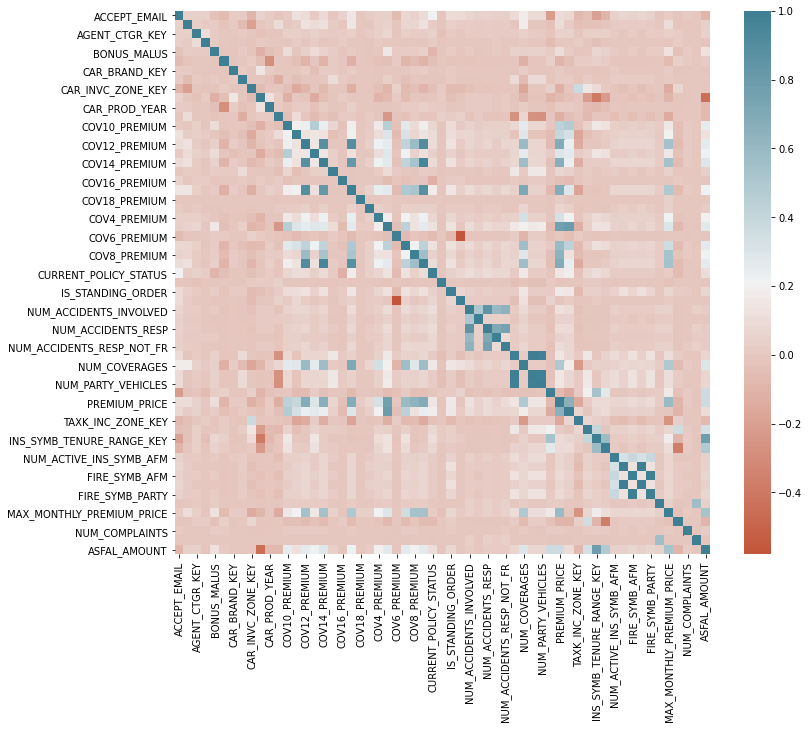

Correlated Features:
 {'COV12_PREMIUM - COV14_PREMIUM': 0.8793063123704427, 'COV12_PREMIUM - COV17_PREMIUM': 0.8966407647086355, 'COV14_PREMIUM - COV17_PREMIUM': 0.8213434738092633, 'COV12_PREMIUM - COV9_PREMIUM': 0.910797942086417, 'COV14_PREMIUM - COV9_PREMIUM': 0.9559475165300709, 'COV17_PREMIUM - COV9_PREMIUM': 0.8741869512476901, 'NUM_ACCIDENTS_INVOLVED - NUM_ACCIDENTS_RESP': 0.8521798522569984, 'NUM_ACCIDENTS_INVOLVED - NUM_ACCIDENTS_RESP_FR': 0.6033098531610072, 'NUM_ACCIDENTS_RESP - NUM_ACCIDENTS_RESP_FR': 0.706608627756811, 'NUM_ACCIDENTS_INVOLVED - NUM_ACCIDENTS_RESP_NOT_FR': 0.6423854307260524, 'NUM_ACCIDENTS_RESP - NUM_ACCIDENTS_RESP_NOT_FR': 0.7549038302287268, 'COV17_PREMIUM - NUM_COVERAGES': 0.7164636675081163, 'NUM_ACTIVE_SYMB - NUM_PARTY_ACTIVE_SYMB': 0.9939153249953463, 'NUM_ACTIVE_SYMB - NUM_PARTY_VEHICLES': 0.9820631214495514, 'NUM_PARTY_ACTIVE_SYMB - NUM_PARTY_VEHICLES': 0.9880379363602511, 'COV12_PREMIUM - PREMIUM_PRICE': 0.6843401379266187, 'COV14_PREMIUM - PREMI

In [10]:
#! /usr/bin/python3
#Feature Selection Functions
import sys
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.feature_selection import mutual_info_classif
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif


# Description: Feature Importance Using Filter Methods (do not incorporate in specific ML algorithm)
# Method 1: Correlation Coefficient (based on Pearson Correlation)
print('Method 1: Correlation Coefficient (based on Pearson Correlation)')
correlation_matrix = DF.corr()  # correlation_matrix = x.corr()
# Plot the Correlation Matrix
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, cmap=sns.diverging_palette(20, 220, n=200))  # annot=True, fmt="d"
plt.show()
cor_target = abs(correlation_matrix["CURRENT_POLICY_STATUS"])  # correlation with output variable
cor_matrix_importance = cor_target[cor_target >= 0.0]  # selecting highly correlated features
#print('Correlation Coefficient Scores:\n', cor_matrix_importance)  # relevant_features

# Extra investigation regarding correlation between features
correlated_features = {}

for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) > 0.6:
            colname = correlation_matrix.columns[i]
            col2 = correlation_matrix.columns[j]
            correlated_features[col2 + ' - ' + colname] = abs(correlation_matrix.iloc[i, j])

print('Correlated Features:\n', correlated_features)


Method 2: Information Gain (Mutual information for a discrete target)


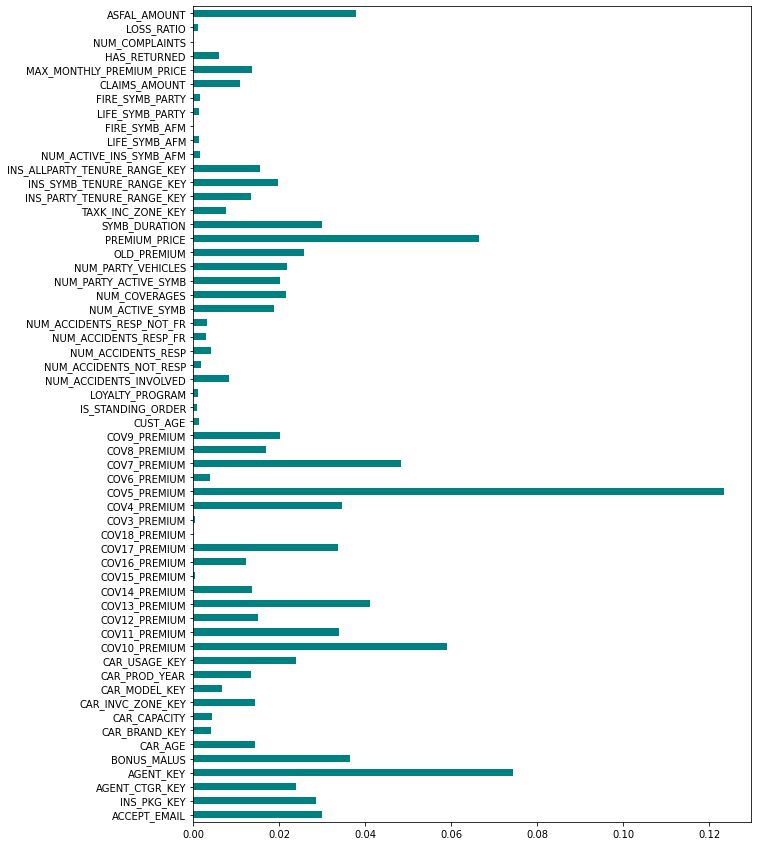

Information Gain Scores:
 ACCEPT_EMAIL                     0.029888
INS_PKG_KEY                      0.028638
AGENT_CTGR_KEY                   0.024039
AGENT_KEY                        0.074319
BONUS_MALUS                      0.036597
CAR_AGE                          0.014407
CAR_BRAND_KEY                    0.004097
CAR_CAPACITY                     0.004360
CAR_INVC_ZONE_KEY                0.014341
CAR_MODEL_KEY                    0.006861
CAR_PROD_YEAR                    0.013428
CAR_USAGE_KEY                    0.024045
COV10_PREMIUM                    0.058954
COV11_PREMIUM                    0.033927
COV12_PREMIUM                    0.015040
COV13_PREMIUM                    0.041180
COV14_PREMIUM                    0.013728
COV15_PREMIUM                    0.000479
COV16_PREMIUM                    0.012378
COV17_PREMIUM                    0.033626
COV18_PREMIUM                    0.000000
COV3_PREMIUM                     0.000443
COV4_PREMIUM                     0.034642
COV5_PRE

In [11]:
# Method 2: Information Gain (Mutual information for a discrete target)

print('Method 2: Information Gain (Mutual information for a discrete target)')
mutual_info_cl = mutual_info_classif(X, Y.astype('category'))
mutual_info_importance = pd.Series(mutual_info_cl, X.columns)
# Plot the Information Gain Chart
mutual_info_importance.plot(kind='barh', color='teal', figsize=(10,15))
plt.show()
print('Information Gain Scores:\n', mutual_info_importance)  # relevant_features

Method 3: K Best - ANOVA


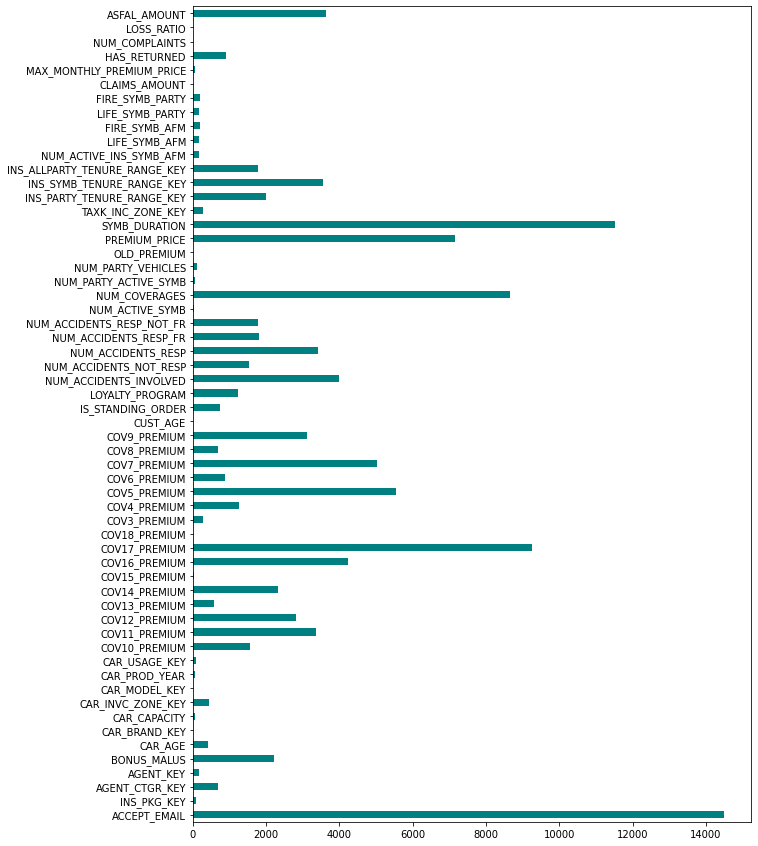

K Best Scores:
 ACCEPT_EMAIL                     14508.291952
INS_PKG_KEY                         94.745385
AGENT_CTGR_KEY                     675.995755
AGENT_KEY                          163.530621
BONUS_MALUS                       2214.487226
CAR_AGE                            421.241856
CAR_BRAND_KEY                        8.457945
CAR_CAPACITY                        43.918298
CAR_INVC_ZONE_KEY                  439.436963
CAR_MODEL_KEY                        5.958844
CAR_PROD_YEAR                       54.471761
CAR_USAGE_KEY                       71.707571
COV10_PREMIUM                     1547.055967
COV11_PREMIUM                     3349.948611
COV12_PREMIUM                     2818.831107
COV13_PREMIUM                      577.440377
COV14_PREMIUM                     2323.995216
COV15_PREMIUM                       34.309740
COV16_PREMIUM                     4221.065031
COV17_PREMIUM                     9255.117522
COV18_PREMIUM                        3.294946
COV3_PREMIUM      

In [12]:
# Method 3: K Best - ANOVA
print('Method 3: K Best - ANOVA')

kbest_selector = SelectKBest(score_func=f_classif, k='all')  # apply SelectKBest class to extract top k best features
kbest_fs = kbest_selector.fit(X, Y)  # apply feature selection fit_transform(x, y)
kbest_importance = pd.Series(np.nan_to_num(kbest_fs.scores_), X.columns)
# Plot the K Best Chart
kbest_importance.plot(kind='barh', color='teal', figsize=(10,15))
plt.show()
print('K Best Scores:\n', kbest_importance)


In [13]:
import copy

mutual_info_importancedf=mutual_info_importance.to_frame()
kbest_importancedf=kbest_importance.to_frame()
features_scores = pd.concat([mutual_info_importancedf, kbest_importancedf], axis=1)
features_scores.columns=['InfoGain', 'Kbest']
features_scores['CombScore']= features_scores['InfoGain']*features_scores['Kbest']
i=0
final_feature_list=[]
for index, row in features_scores.sort_values(by=['CombScore', 'Kbest', 'InfoGain'], ascending=False).iterrows():
    i+=1
    if i>15:
        break
    final_feature_list.append(index)

col_to_remove=[]
for col in list(X.columns):
  if col not in final_feature_list:
    #print('Droping column:', col)
    col_to_remove.append(col)
X.drop(col_to_remove, axis=1, inplace=True)
print('Final features: ',list(X.columns))
X.head()

Final features:  ['ACCEPT_EMAIL', 'BONUS_MALUS', 'COV10_PREMIUM', 'COV11_PREMIUM', 'COV16_PREMIUM', 'COV17_PREMIUM', 'COV4_PREMIUM', 'COV5_PREMIUM', 'COV7_PREMIUM', 'COV9_PREMIUM', 'NUM_COVERAGES', 'PREMIUM_PRICE', 'SYMB_DURATION', 'INS_SYMB_TENURE_RANGE_KEY', 'ASFAL_AMOUNT']


,ACCEPT_EMAIL,BONUS_MALUS,COV10_PREMIUM,COV11_PREMIUM,COV16_PREMIUM,COV17_PREMIUM,COV4_PREMIUM,COV5_PREMIUM,COV7_PREMIUM,COV9_PREMIUM,NUM_COVERAGES,PREMIUM_PRICE,SYMB_DURATION,INS_SYMB_TENURE_RANGE_KEY,ASFAL_AMOUNT
400657,0,-2,0.54,4.93,0.0,0.00,0.00,38.81,2.06,0.00,9,47.02,3,1,141.06
43696,1,-2,1.10,9.86,0.0,0.00,5.80,58.54,4.11,0.00,12,80.76,6,1,80.76
567914,0,0,0.00,33.12,0.0,0.00,0.00,138.60,21.03,0.00,8,203.30,12,4,1215.29
847635,1,-2,1.44,0.00,0.0,7.63,1.15,55.77,9.66,8.02,17,151.62,6,1,151.62
605320,1,-2,0.00,0.00,0.0,0.00,0.00,31.15,0.00,0.00,6,31.15,3,1,31.15


In [15]:
final_feature_list.append('SYMB')
final_feature_list.append('CURRENT_POLICY_STATUS')
#Since our data contain monthly snapshots of contracts, some records might repeat themselves, even for the important features that we kept. So remove duplicates and keep last versions of records.
DF.drop_duplicates(subset=final_feature_list, keep='last', inplace=False)
FX, FZ, FY = DF.drop(['SYMB', 'CURRENT_POLICY_STATUS'], axis=1), DF['SYMB'], DF['CURRENT_POLICY_STATUS']
FX.drop(col_to_remove, axis=1, inplace=True)

In [16]:
DF.describe()

,ACCEPT_EMAIL,INS_PKG_KEY,AGENT_CTGR_KEY,AGENT_KEY,BONUS_MALUS,CAR_AGE,CAR_BRAND_KEY,CAR_CAPACITY,CAR_INVC_ZONE_KEY,CAR_MODEL_KEY,CAR_PROD_YEAR,CAR_USAGE_KEY,COV10_PREMIUM,COV11_PREMIUM,COV12_PREMIUM,COV13_PREMIUM,COV14_PREMIUM,COV15_PREMIUM,COV16_PREMIUM,COV17_PREMIUM,COV18_PREMIUM,COV3_PREMIUM,COV4_PREMIUM,COV5_PREMIUM,COV6_PREMIUM,COV7_PREMIUM,COV8_PREMIUM,COV9_PREMIUM,CURRENT_POLICY_STATUS,CUST_AGE,IS_STANDING_ORDER,LOYALTY_PROGRAM,NUM_ACCIDENTS_INVOLVED,NUM_ACCIDENTS_NOT_RESP,NUM_ACCIDENTS_RESP,NUM_ACCIDENTS_RESP_FR,NUM_ACCIDENTS_RESP_NOT_FR,NUM_ACTIVE_SYMB,NUM_COVERAGES,NUM_PARTY_ACTIVE_SYMB,NUM_PARTY_VEHICLES,OLD_PREMIUM,PREMIUM_PRICE,SYMB_DURATION,TAXK_INC_ZONE_KEY,INS_PARTY_TENURE_RANGE_KEY,INS_SYMB_TENURE_RANGE_KEY,INS_ALLPARTY_TENURE_RANGE_KEY,NUM_ACTIVE_INS_SYMB_AFM,LIFE_SYMB_AFM,FIRE_SYMB_AFM,LIFE_SYMB_PARTY,FIRE_SYMB_PARTY,CLAIMS_AMOUNT,MAX_MONTHLY_PREMIUM_PRICE,HAS_RETURNED,NUM_COMPLAINTS,LOSS_RATIO,ASFAL_AMOUNT
count,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.00000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,3.000000e+05,300000.000000
mean,0.387353,7530.055713,159.450417,145522.898150,-1.750293,17.548877,6198.664333,14.358163,1007.496490,22055.032973,2000.244470,692.357130,1.483431,7.181811,0.710489,1.170445,0.759400,0.091649,0.055158,1.579183,0.006051,0.066452,1.866939,72.261194,-0.352243,5.361887,3.341842,2.461519,0.403007,47.943937,0.018087,0.030757,0.037607,0.009487,0.026257,0.012647,0.014033,1.351887,9.521040,1.345830,1.336413,0.807693,98.045272,6.57000,1992.156650,3.122810,2.083330,1.694380,0.080827,0.021227,0.034553,0.021023,0.034017,281.391354,15.341285,0.339493,0.000493,7.718182e+01,470.452480
std,0.493347,238.503213,3.467507,5498.503362,0.730061,25.817688,358.989289,47.715928,34.850091,5654.715631,83.811644,12.606127,1.330953,8.917969,2.455180,2.090667,2.473954,1.356839,0.384733,4.413443,1.500033,1.298787,5.019867,37.407376,3.406949,6.610295,27.125081,8.060410,0.490503,121.565110,0.133265,0.172658,0.208932,0.099281,0.174013,0.116391,0.125339,0.977408,3.630345,0.969719,0.942452,0.394113,68.736017,3.15463,375.568855,1.540518,0.975467,1.033912,0.876590,0.222986,0.257617,0.222069,0.255825,4082.158672,7.247346,0.473538,0.023518,2.721680e+03,499.078378
min,-1.000000,7087.000000,153.000000,136733.000000,-2.000000,0.000000,-1.000000,1.000000,937.000000,-1.000000,0.000000,646.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-23.910000,4.960000,-382.760000,0.000000,0.000000,0.000000,0.000000,-6179.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,4.000000,0.000000,0.000000,0.000000,0.090000,3.00000,1314.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-124.660000,-7.360000,0.000000,0.000000,-6.384000e+01,-315.780000
25%,0.000000,7390.000000,157.000000,141281.000000,-2.000000,13.000000,6030.000000,9.000000,987.000000,22671.000000,2000.000000,697.000000,0.780000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,46.000000,0.000000,0.000000,0.000000,0.000000,0.000000,26.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,7.000000,1.000000,1.000000,1.000000,55.400000,3.00000,1658.000000,2.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.0000

In [17]:
from sklearn.feature_selection import RFE

def feature_wrapping(scenario, model, x, y):
    # Description: Feature Importance Using RFE Wrapper Method (specific ML algorithm)
    # args: (scenario -> Model_A/Model_B, model-> best model, x-> x_train, y-> y_train)
    
    # create the RFE model, evaluate a subset of attributes and select most important attributes
    rfe = RFE(model)
    rfe = rfe.fit(x, y)
    print('All Columns:', x.columns)
    
    # summarize the selection of the attributes
    print("Num Of Selected Features: %d" % rfe.n_features_)  # the number of features that have been selected
    print("Selected Features: %s" % rfe.support_)  # an array that indicates whether or not a feature was selected
    print("Feature Ranking: %s" % rfe.ranking_)  # the ranking of the features
    feature_index = rfe.get_support(True).tolist()
    rfe_features = list(x.iloc[:, feature_index].columns)

    for i in range(x.shape[1]):
        print('Column: %d, Name: %s, Selected: %s, Rank: %.3f' % (i, x.columns[i], rfe.support_[i],rfe.ranking_[i]))
    
    print('Selected RFE Features:\n', rfe_features)
    rfe_importance = pd.Series(np.nan_to_num(rfe.ranking_), x.columns)
    print('Selected RFE Importance:', rfe_importance)

    return rfe_features

In [18]:
import numpy as np
import pandas as pd
import pickle5 as pickle
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.metrics import make_scorer, accuracy_score, balanced_accuracy_score, precision_score, recall_score, f1_score, cohen_kappa_score, roc_auc_score
from collections import OrderedDict
import warnings
warnings.filterwarnings("ignore")



# Description: Algorithm Comparison Based On Accuracy, Precision, Recall, F1-Score using k_folds
print('Starting algorithm_comparison')

# prepare models
models = [
    ('LRB', LogisticRegression(solver='liblinear', class_weight='balanced', max_iter=600, n_jobs=-1))
    ,('LR', LogisticRegression(solver='liblinear', max_iter=600, n_jobs=-1))
    ,('LDA', LinearDiscriminantAnalysis())
    ,('RF', RandomForestClassifier(bootstrap=False, n_estimators=20))
    ,('DTC', DecisionTreeClassifier())
    #,('NB', GaussianNB()),
    #,('SVM', SVC(gamma='auto', probability=True)),
    #,('KNN', KNeighborsClassifier(n_jobs=-1, n_neighbors=7, metric='braycurtis', weights='distance'))
]

scoring = {'accuracy': make_scorer(accuracy_score),
            'balanced_accuracy': make_scorer(balanced_accuracy_score),
            'precision': make_scorer(precision_score),
            'recall': make_scorer(recall_score),
            'f1_score': make_scorer(f1_score)
            #,'cohen_kappa_score': make_scorer(cohen_kappa_score),
            ,'roc_auc_score': make_scorer(roc_auc_score)
            }

dictionary = {}
best_models = {}


#x=X.to_numpy()
#y=Y.to_numpy()
# evaluate each model in turn
final_dict={}
for name, model in models:
    scores_dictionary = {}
    kfold = model_selection.KFold(n_splits=5, random_state=np.random.randint(100), shuffle=True)

    for metric, fun in scoring.items():
        cv_results = model_selection.cross_val_score(estimator=model, X=X, y=Y, cv=kfold,scoring=scoring.get(metric))
        scores_dictionary[metric] = cv_results.mean()  # stores mean score for each metric
        # print('cv results', metric, '->', cv_results)
    print('Algorithm:', name, '->', scores_dictionary)
    dictionary[model] = scores_dictionary # {RF:{accuracy:0.8, precision:0.1...}}
    best_models[model] = scores_dictionary['balanced_accuracy']  # {RF: 0.8,...}
    final_dict[name] = scores_dictionary
    # msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())

finalDF=pd.DataFrame.from_dict(final_dict, orient='index')
#print(dictionary)
#print(best_models)

# choose the best two models of the ordered dictionary
best_models = OrderedDict(sorted(best_models.items(), key=lambda item: item[1], reverse=True))
model_a = best_models.popitem(last=False)[0]  # get the best model
model_b = best_models.popitem(last=False)[0]  # get the second best model
model_c = best_models.popitem(last=False)[0]  # get the third best model
model_scores = {model_a: dictionary.get(model_a), model_b: dictionary.get(model_b), model_c: dictionary.get(model_c)}  # keep model scores
print('Model_a:', model_a, 'Model_b:', model_b, 'Model_c:', model_c)
best_models = {'Model_A': model_a, 
               'Model_B': model_b, 
               'Model_C': model_c}

    

Starting algorithm_comparison
Algorithm: LRB -> {'accuracy': 0.6739966666666668, 'balanced_accuracy': 0.6692085237290675, 'precision': 0.5870280298667894, 'recall': 0.6445025112697484, 'f1_score': 0.6144164130586278, 'roc_auc_score': 0.6692085237290675}
Algorithm: LR -> {'accuracy': 0.67499, 'balanced_accuracy': 0.6384150243562392, 'precision': 0.6370261101324675, 'recall': 0.4498663840674915, 'f1_score': 0.5273286613979135, 'roc_auc_score': 0.6384150243562392}
Algorithm: LDA -> {'accuracy': 0.6741133333333335, 'balanced_accuracy': 0.6368972907381749, 'precision': 0.6369834173753028, 'recall': 0.44501639326806475, 'f1_score': 0.5239584507723654, 'roc_auc_score': 0.6368972907381748}
Algorithm: RF -> {'accuracy': 0.7290633333333334, 'balanced_accuracy': 0.7178305967169465, 'precision': 0.6673944868763279, 'recall': 0.6566131747992257, 'f1_score': 0.6615714066562439, 'roc_auc_score': 0.7175509721402227}
Algorithm: DTC -> {'accuracy': 0.6967933333333335, 'balanced_accuracy': 0.683715758977



---



In [19]:
finalDF.head()

,accuracy,balanced_accuracy,precision,recall,f1_score,roc_auc_score
LRB,0.673997,0.669209,0.587028,0.644503,0.614416,0.669209
LR,0.674990,0.638415,0.637026,0.449866,0.527329,0.638415
LDA,0.674113,0.636897,0.636983,0.445016,0.523958,0.636897
RF,0.729063,0.717831,0.667394,0.656613,0.661571,0.717551
DTC,0.696793,0.683716,0.624010,0.619598,0.622309,0.684129


In [20]:
final_features_to_remove_model=[]
for model in [model_a, model_b, model_c]:
    scores = model_scores.get(model)  # get scores dict for each model
    model_params=model.get_params()
    scenario, = [key for (key, value) in best_models.items() if value == model]
    print('Scenario:', scenario)
    print('Model:', model)
    #print('Model Params:', model_params)

    # Feature Selection (Wrapper method)
    print('Training - ' + scenario + ' Feature Wrapping')
    features = feature_wrapping(scenario, model, X, Y)
    ctrm=[]
    for col in list(X.columns):
      if col not in features:
        ctrm.append(col)
    final_features_to_remove_model.append(ctrm)
    fx=(X.drop(ctrm, axis=1)).to_numpy()
    # Model Finalization
    print( 'Training - ' + scenario + ' Train Finalization')
    # Description: Fit the final classification model on training set
    model.fit(fx, Y)
    # save the model to disk
    filename = scenario + '.sav'
    pickle.dump(model, open(filename, 'wb'))


Scenario: Model_A
Model: RandomForestClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=20,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)
Training - Model_A Feature Wrapping
All Columns: Index(['ACCEPT_EMAIL', 'BONUS_MALUS', 'COV10_PREMIUM', 'COV11_PREMIUM',
       'COV16_PREMIUM', 'COV17_PREMIUM', 'COV4_PREMIUM', 'COV5_PREMIUM',
       'COV7_PREMIUM', 'COV9_PREMIUM', 'NUM_COVERAGES', 'PREMIUM_PRICE',
       'SYMB_DURATION', 'INS_SYMB_TENURE_RANGE_KEY', 'ASFAL_AMOUNT'],
      dtype='object')
Num Of Selected Features: 7
Selected Features: [False False  True Fal

In [33]:
# Model Predictions

DFP = pd.read_pickle('drive/MyDrive/ML_Churn_Data/ET_ML_CHURN_FI_TEST')
XP = pd.read_pickle('drive/MyDrive/ML_Churn_Data/ET_ML_CHURN_FI_TEST_X')
YP = pd.read_pickle('drive/MyDrive/ML_Churn_Data/ET_ML_CHURN_FI_TEST_Y')
IDP = pd.read_pickle('drive/MyDrive/ML_Churn_Data/ET_ML_CHURN_FI_TEST_Z')
'''
DFP = DFP1.sample(n=6000, random_state=1)
XP = XP1.sample(n=6000, random_state=1)
YP = YP1.sample(n=6000, random_state=1)
IDP = IDP1.sample(n=6000, random_state=1)
'''


'\nDFP = DFP1.sample(n=6000, random_state=1)\nXP = XP1.sample(n=6000, random_state=1)\nYP = YP1.sample(n=6000, random_state=1)\nIDP = IDP1.sample(n=6000, random_state=1)\n'

In [34]:
DFP.drop(['NEW_PREMIUM_PRICE', 'NEW_MONTHLY_PREMIUM_PRICE'], axis=1, inplace=True)
XP.drop(['NEW_PREMIUM_PRICE', 'NEW_MONTHLY_PREMIUM_PRICE'], axis=1, inplace=True)
XP.drop(['COV1_PREMIUM','COV2_PREMIUM', 'COV19_PREMIUM', 'COV20_PREMIUM','DISC_105', 'DISC_162','DISC_107','DISC_110','DISC_130','DISC_131','DISC_132','DISC_145','DISC_146','DISC_147','DISC_148','DISC_149','DISC_156','DISC_157','DISC_158','DISC_159','DISC_160','DISC_161','DISC_162','DISC_163','DISC_500','DISC_501','DISC_505','DISC_506','DISC_507' ], axis=1, inplace=True) #removed because after feature selection methods (Corr.Matrix ) it became evident that they contain null values that were not handled in the ETL (DB) process
DFP.drop(['COV1_PREMIUM','COV2_PREMIUM','COV19_PREMIUM', 'COV20_PREMIUM', 'DISC_105', 'DISC_162','DISC_107','DISC_110','DISC_130','DISC_131','DISC_132','DISC_145','DISC_146','DISC_147','DISC_148','DISC_149','DISC_156','DISC_157','DISC_158','DISC_159','DISC_160','DISC_161','DISC_162','DISC_163','DISC_500','DISC_501','DISC_505','DISC_506','DISC_507'], axis=1, inplace=True) #removed because after feature selection methods (Corr.Matrix ) it became evident that they contain null values that were not handled in the ETL (DB) process


In [35]:
DFP.head()

,ACCEPT_EMAIL,INS_PKG_KEY,AGENT_CTGR_KEY,AGENT_KEY,BONUS_MALUS,CAR_AGE,CAR_BRAND_KEY,CAR_CAPACITY,CAR_INVC_ZONE_KEY,CAR_MODEL_KEY,CAR_PROD_YEAR,CAR_USAGE_KEY,COV10_PREMIUM,COV11_PREMIUM,COV12_PREMIUM,COV13_PREMIUM,COV14_PREMIUM,COV15_PREMIUM,COV16_PREMIUM,COV17_PREMIUM,COV18_PREMIUM,COV3_PREMIUM,COV4_PREMIUM,COV5_PREMIUM,COV6_PREMIUM,COV7_PREMIUM,COV8_PREMIUM,COV9_PREMIUM,CURRENT_POLICY_STATUS,CUST_AGE,IS_STANDING_ORDER,LOYALTY_PROGRAM,NUM_ACCIDENTS_INVOLVED,NUM_ACCIDENTS_NOT_RESP,NUM_ACCIDENTS_RESP,NUM_ACCIDENTS_RESP_FR,NUM_ACCIDENTS_RESP_NOT_FR,NUM_ACTIVE_SYMB,NUM_COVERAGES,NUM_PARTY_ACTIVE_SYMB,NUM_PARTY_VEHICLES,OLD_PREMIUM,PREMIUM_PRICE,SYMB,SYMB_DURATION,TAXK_INC_ZONE_KEY,INS_PARTY_TENURE_RANGE_KEY,INS_SYMB_TENURE_RANGE_KEY,INS_ALLPARTY_TENURE_RANGE_KEY,NUM_ACTIVE_INS_SYMB_AFM,LIFE_SYMB_AFM,FIRE_SYMB_AFM,LIFE_SYMB_PARTY,FIRE_SYMB_PARTY,CLAIMS_AMOUNT,MAX_MONTHLY_PREMIUM_PRICE,HAS_RETURNED,NUM_COMPLAINTS,LOSS_RATIO,ASFAL_AMOUNT
0,0,7489,164,138621,-2,19,6413,9,1042,23268,2002,697,0.00,0.00,0.0,4.75,0.0,0.0,3.54,0.0,0,0.0,0.86,67.43,0.0,11.37,0.0,0.0,1,54,0,0,0,0,0,0,0,1,8,1,1,1,87.95,101912447,6,2524,4,4,4,0,0,0,0,0,0.00,14.66,0,0,0.00,1393.44
1,0,7732,164,141769,-2,23,6640,11,1042,23994,1998,697,0.86,5.37,0.0,1.60,0.0,0.0,1.75,0.0,0,0.0,0.00,28.85,0.0,0.00,0.0,0.0,1,71,0,0,0,0,0,0,0,1,8,1,1,1,38.43,103362924,3,2500,3,2,1,0,0,0,0,0,238.62,12.81,1,0,85.48,279.16
2,1,7897,157,140720,-2,31,6171,14,947,24276,1990,697,0.81,7.61,0.0,2.02,0.0,0.0,1.50,0.0,0,0.0,0.00,35.12,0.0,0.00,0.0,0.0,1,48,0,0,0,0,0,0,0,1,8,1,1,1,47.06,103789203,3,1676,4,1,1,0,0,0,0,0,0.00,15.69,0,0,0.00,47.06
3,1,7832,156,150001,-2,16,5984,4,1042,22996,2005,697,1.23,11.09,0.0,1.52,0.0,0.0,3.32,0.0,0,0.0,7.04,45.92,-0.1,4.63,0.0,0.0,1,47,0,1,0,0,0,0,0,1,11,1,1,1,74.65,103095026,6,1987,3,3,3,1,1,0,1,0,0.00,14.36,0,0,0.00,584.95
4,1,7177,157,137249,-2,17,5955,11,997,23617,2004,697,0.58,5.24,0.0,0.72,0.0,0.0,1.57,0.0,0,0.0,0.00,27.30,0.0,2.18,0.0,0.0,1,51,0,0,0,0,0,0,0,1,9,1,1,1,37.59,103470329,3,2292,6,2,1,0,0,0,0,0,0.00,12.76,0,0,0.00,262.26


In [36]:
print(col_to_remove)
XP.drop(col_to_remove, axis=1, inplace=True)

XP.head()

['INS_PKG_KEY', 'AGENT_CTGR_KEY', 'AGENT_KEY', 'CAR_AGE', 'CAR_BRAND_KEY', 'CAR_CAPACITY', 'CAR_INVC_ZONE_KEY', 'CAR_MODEL_KEY', 'CAR_PROD_YEAR', 'CAR_USAGE_KEY', 'COV12_PREMIUM', 'COV13_PREMIUM', 'COV14_PREMIUM', 'COV15_PREMIUM', 'COV18_PREMIUM', 'COV3_PREMIUM', 'COV6_PREMIUM', 'COV8_PREMIUM', 'CUST_AGE', 'IS_STANDING_ORDER', 'LOYALTY_PROGRAM', 'NUM_ACCIDENTS_INVOLVED', 'NUM_ACCIDENTS_NOT_RESP', 'NUM_ACCIDENTS_RESP', 'NUM_ACCIDENTS_RESP_FR', 'NUM_ACCIDENTS_RESP_NOT_FR', 'NUM_ACTIVE_SYMB', 'NUM_PARTY_ACTIVE_SYMB', 'NUM_PARTY_VEHICLES', 'OLD_PREMIUM', 'TAXK_INC_ZONE_KEY', 'INS_PARTY_TENURE_RANGE_KEY', 'INS_ALLPARTY_TENURE_RANGE_KEY', 'NUM_ACTIVE_INS_SYMB_AFM', 'LIFE_SYMB_AFM', 'FIRE_SYMB_AFM', 'LIFE_SYMB_PARTY', 'FIRE_SYMB_PARTY', 'CLAIMS_AMOUNT', 'MAX_MONTHLY_PREMIUM_PRICE', 'HAS_RETURNED', 'NUM_COMPLAINTS', 'LOSS_RATIO']


,ACCEPT_EMAIL,BONUS_MALUS,COV10_PREMIUM,COV11_PREMIUM,COV16_PREMIUM,COV17_PREMIUM,COV4_PREMIUM,COV5_PREMIUM,COV7_PREMIUM,COV9_PREMIUM,NUM_COVERAGES,PREMIUM_PRICE,SYMB_DURATION,INS_SYMB_TENURE_RANGE_KEY,ASFAL_AMOUNT
0,0,-2,0.00,0.00,3.54,0.0,0.86,67.43,11.37,0.0,8,87.95,6,4,1393.44
1,0,-2,0.86,5.37,1.75,0.0,0.00,28.85,0.00,0.0,8,38.43,3,2,279.16
2,1,-2,0.81,7.61,1.50,0.0,0.00,35.12,0.00,0.0,8,47.06,3,1,47.06
3,1,-2,1.23,11.09,3.32,0.0,7.04,45.92,4.63,0.0,11,74.65,6,3,584.95
4,1,-2,0.58,5.24,1.57,0.0,0.00,27.30,2.18,0.0,9,37.59,3,2,262.26


In [37]:
def make_predictions(model, x, symb):
    # convert df to numpy array
    X = x.to_numpy()
    xid = symb.to_numpy()
    # make predictions and probabilities
    predictions = model.predict(X)
    predictions_prob = model.predict_proba(X)

    # show the inputs and predicted outputs
    #for i in range(len(X)):
    #    print("X=%s, Predicted=%s, Predicted Prob=%s" % (xid[i], predictions[i], predictions_prob[i]))

    return xid, predictions, predictions_prob

Model Prediction for:  Model_A.sav
              precision    recall  f1-score   support

           0       0.15      0.74      0.25     11423
           1       0.90      0.35      0.51     74089

    accuracy                           0.41     85512
   macro avg       0.52      0.55      0.38     85512
weighted avg       0.80      0.41      0.47     85512



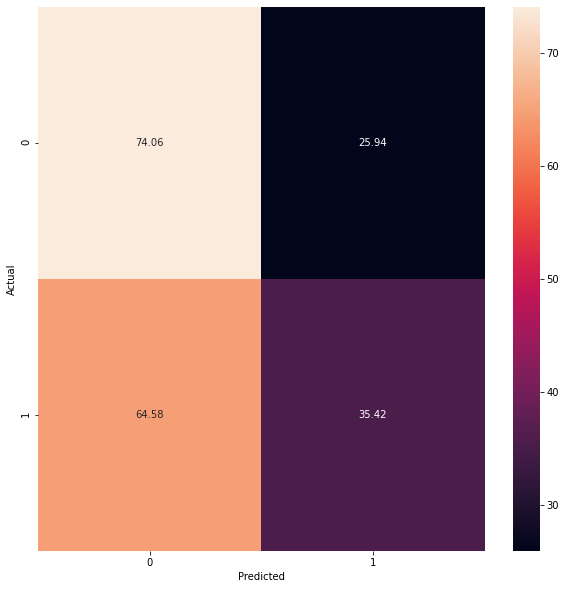

Model Prediction for:  Model_B.sav
              precision    recall  f1-score   support

           0       0.15      0.68      0.25     11423
           1       0.90      0.42      0.57     74089

    accuracy                           0.45     85512
   macro avg       0.52      0.55      0.41     85512
weighted avg       0.80      0.45      0.53     85512



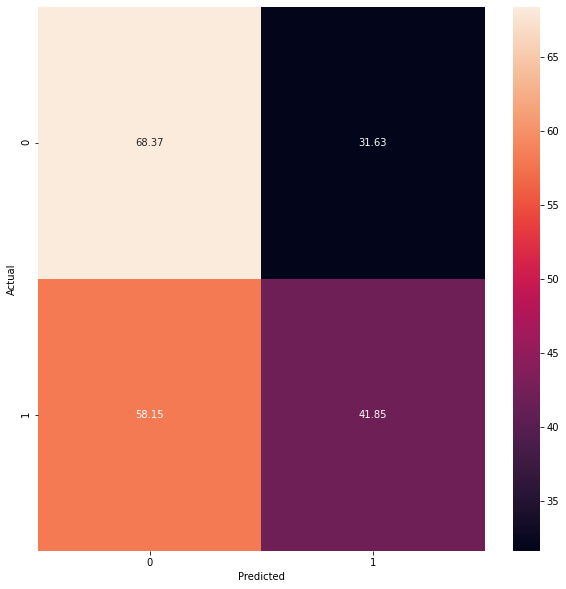

Model Prediction for:  Model_C.sav
              precision    recall  f1-score   support

           0       0.12      0.79      0.22     11423
           1       0.82      0.14      0.24     74089

    accuracy                           0.23     85512
   macro avg       0.47      0.47      0.23     85512
weighted avg       0.72      0.23      0.24     85512



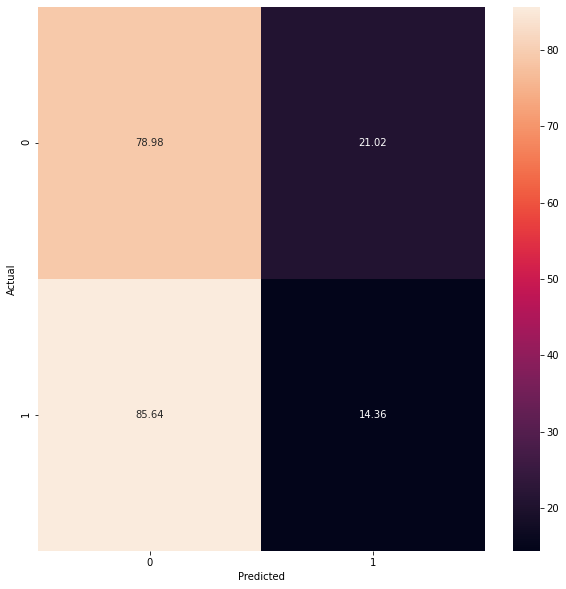

In [38]:
#! /usr/bin/python3
import datetime
from sklearn import metrics
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

i=-1
for model_name in ['Model_A.sav', 'Model_B.sav', 'Model_C.sav']:
    i+=1
    print('Model Prediction for: ', model_name)

    # Load Stored Models
    model = pickle.load(open(model_name, 'rb'))


    # Make New Predictions
    #print(final_features_to_remove_model[i])
    
    xid, predictions, predictions_prob = make_predictions(model, XP.drop(final_features_to_remove_model[i], axis=1), IDP)
    #print('xid is: ', type(xid), ' with value: ', xid)
    #print('predictions is: ', type(predictions), ' with value: ', predictions)
    #print('predictions_prob is: ', type(predictions_prob), ' with value: ', predictions_prob)

    # Printing the precision and recall, among other metrics
    print(metrics.classification_report(YP, predictions))
    cm = confusion_matrix(YP, predictions)
    #print(cm)
    # Normalized confusion matrix
    cmn = (cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]) * 100
    fig, ax = plt.subplots(figsize=(10, 10))

    #sns.heatmap(cmn, annot=True, fmt='.2f', xticklabels=['CHURN', 'CHURN'],
    #            yticklabels=['NOT CHURN', 'CHURN'])
    sns.heatmap(cmn, annot=True, fmt='.2f')
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.show()
